Your csv should looks like this [sample](http://datapipes.okfnlabs.org/csv/html/?url=https%3A%2F%2Fyyrcd-1256568788.cos.na-siliconvalley.myqcloud.com%2Fyyrcd%2F2019-10-29-kinetics_sample.csv)  
`Latest: Time (min)` column and `Latest: Absorbance at 523.7 nm` column must exsit 

In [59]:
import pandas as pd
import numpy as np
import io
from scipy.optimize import minimize    # fitting tool
from matplotlib import pyplot as plt   # plotting
%matplotlib inline

In [51]:
def upload():
    from google.colab import files
    uploaded = files.upload()
    csvfile = io.BytesIO(uploaded[list(uploaded.keys())[0]])
    return csvfile

In [53]:
file = 'https://yyrcd-1256568788.cos.na-siliconvalley.myqcloud.com/yyrcd/2019-10-29-kinetics_sample.csv'

In [69]:
def extract_data(file):
    """
    Extract wavenumber and absorbance data from a single txt file with range specified.

    Parameters
    -------
    file : location of the txt file
    for example:
    1. uploaded csv file on google.colab
    2. path of csv on your own pc '\home\richard\chm2045L\enzyme.csv'
    3. an url to the csv file

    Returns
    -------
    times : array
    absorbances : array
    """
    data = pd.read_csv(file)
    headers = list(data.columns)

    for i, d in enumerate(headers):
        if 'Latest: Time' in d:
            pass
            times = data[headers[i]].values
        if 'Latest: Absorbance' in d:
            pass
            absorbances = data[headers[i]].values
    try:
        times
    except NameError:
        print("Error: There must one colum which name contain \"Latest: Time\"")

    try:
        absorbances
    except NameError:
        print("Error: There must one colum which name contain \"Latest: Absorbance\"")

    times = times[np.logical_not(np.isnan(times))]
    times = times * 60  # convert to secends
    absorbances = absorbances[np.logical_not(np.isnan(absorbances))]
    concentrations = absorbances / 79600

    return times, concentrations

In [147]:
def fit_and_plot(times, y_true, label):

    def linear(x, a, b):
        y = a * x + b
        return y

    def loss(para):
        pred = linear(times, para[0], para[1])
        mse = np.mean((y_true - pred)**2)  # mean_squared_error
        mse = mse * 1e8
        return mse

    result = minimize(loss, x0=np.array([1.0, 1.0]), method='Nelder-Mead')
    a = result.x[0]
    b = result.x[1]
    
    plt.figure(figsize=(16, 4))
    plt.plot(times, y_true, 'o-', markersize=1, label=label)
    r2 = loss([a, b]) / 1e8
    plt.plot(times, linear(times, a, b), 'o-', markersize=1, label='y = {:.3e}x + {:.3e}   $\;\;\;R^2$ = {:.2e}'.format(a, b, r2))
    plt.xlabel('Time (sec)')
    plt.ylabel(label)
    plt.title('{} over Time'.format(label),  fontsize=18)
    plt.legend()
    plt.show()

In [151]:
times, concentrations = extract_data(file)

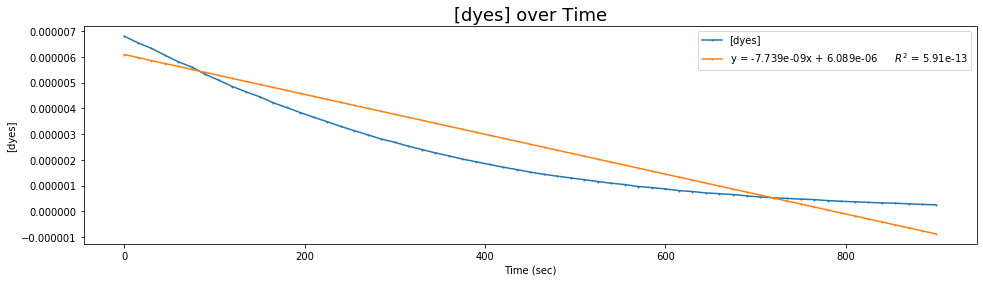

In [148]:
fit_and_plot(times, concentrations, '[dyes]')

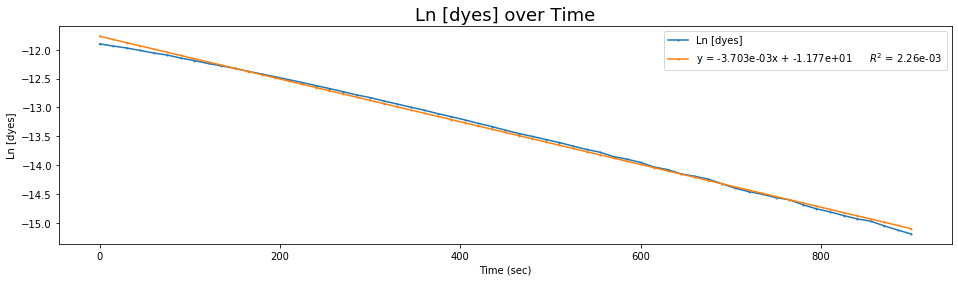

In [149]:
fit_and_plot(times, np.log(concentrations), 'Ln [dyes]')

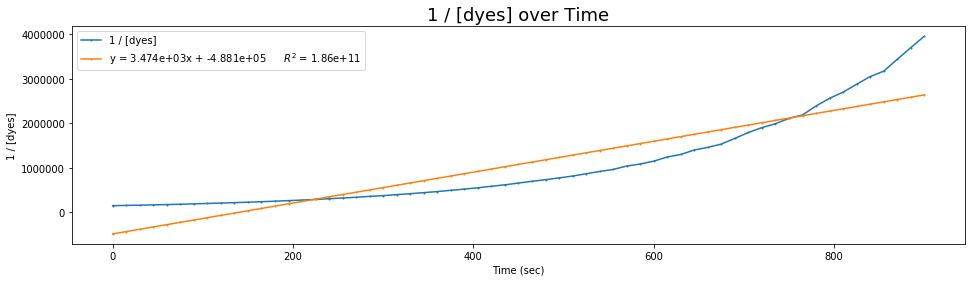

In [150]:
fit_and_plot(times, 1 / concentrations, '1 / [dyes]')